# **ALIGN GUARD INTERNSHIP TASK**
* NAME : ADITI SINGH
* CREATED ON : 22-06-2024


# **CLASSIFICATION OF PHYSIOTHERAPY EXERCISES DATASET**
# **DATA DESCRIPTION**
---
* The dataset comprises sensor measurements from various exercises, stored in multiple CSV files. Here's a concise summary:

* **Files:** Eight CSV files (01_act_1.csv, 02_act_1.csv, etc.) containing sensor data.
* **Rows:** Each file has 30 rows, representing data for individual subjects.
* **Columns:** Each file has 21 columns, corresponding to 7 exercises with 3 parameters each.

**IMPORTING NECCESSARY LIBRARIES**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


**LOADING CSV FILES INTO DATAFRAMES**

In [ ]:
# List of CSV file paths
filepaths = [
    r'/content/01_act_1.csv',
    r'/content/02_act_1.csv',
    r'/content/03_act_1.csv',
    r'/content/04_act_1.csv',
    r'/content/04_act_2.csv',
    r'/content/05_act_1.csv',
    r'/content/06_act_1.csv',
    r'/content/07_act_1.csv',
]

**VERIFYING PATHS**

In [ ]:
# Verify paths exist and read the CSV files
df_list = []
for fp in filepaths:
    if os.path.isfile(fp):
        df_list.append(pd.read_csv(fp, header=None))
    else:
        print(f"File not found: {fp}")

**COMBINING DATAFRAMES**

In [ ]:
# Combine the DataFrames
df_combined = pd.concat(df_list, ignore_index=True)

In [ ]:
# Generate column names based on the shape of df_combined
num_exercises = 7
num_params = 3
num_sensors = 4
num_columns = df_combined.shape[1]

In [ ]:
# Adjust column name generation logic
column_names = []
for sensor in range(1, num_sensors + 1):
    for exercise in range(1, num_exercises + 1):
        for param in range(1, num_params + 1):
            column_names.append(f'sensor_{sensor}_exer_{exercise}_param_{param}')


In [ ]:
# Truncate or extend the column_names list to match the number of columns in df_combined
if len(column_names) > num_columns:
    column_names = column_names[:num_columns]
elif len(column_names) < num_columns:
    column_names.extend([f'col_{i}' for i in range(len(column_names) + 1, num_columns + 1)])

df_combined.columns = column_names


**BASIC INFORMATION ABOUT THE DATASET**

In [ ]:
# Display basic information about the combined DataFrame
print(df_combined.head())
print(df_combined.info())
print(df_combined.describe())


      sensor_1_exer_1_param_1  sensor_1_exer_1_param_2  \
0  2018-11-08 11:34:51.474000                -0.546875   
1  2018-11-08 11:34:51.484000                -0.531250   
2  2018-11-08 11:34:51.494000                -0.531250   
3  2018-11-08 11:34:51.504000                -0.531250   
4  2018-11-08 11:34:51.513000                -0.515625   

   sensor_1_exer_1_param_3  sensor_1_exer_2_param_1  
0                -0.828125                -0.109375  
1                -0.828125                -0.109375  
2                -0.828125                -0.109375  
3                -0.843750                -0.109375  
4                -0.843750                -0.109375  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50075 entries, 0 to 50074
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sensor_1_exer_1_param_1  50075 non-null  object 
 1   sensor_1_exer_1_param_2  50075 non-null  float64
 2 

**FILLING THE MISSING VALUES**

In [ ]:
# Fill missing values
numerical_cols = df_combined.select_dtypes(include=['number']).columns
categorical_cols = df_combined.select_dtypes(include=['object']).columns

df_combined[numerical_cols] = df_combined[numerical_cols].fillna(df_combined[numerical_cols].mean())
if not categorical_cols.empty:
    df_combined[categorical_cols] = df_combined[categorical_cols].fillna(df_combined[categorical_cols].mode().iloc[0])

print("Missing values after imputation:")
print(df_combined.isnull().sum())


Missing values after imputation:
sensor_1_exer_1_param_1    0
sensor_1_exer_1_param_2    0
sensor_1_exer_1_param_3    0
sensor_1_exer_2_param_1    0
dtype: int64


**REMOVING DUPLICATES**

In [ ]:
# Remove duplicates
df_combined.drop_duplicates(inplace=True)


**DROPPING NON- NUMERIC COLUMNS**

In [ ]:
# Drop non-numeric columns
df_combined = df_combined.select_dtypes(include=['number'])


**STANDARDIZATION**

In [ ]:
# Standardize features (only numerical)
scaler = StandardScaler()
df_combined[numerical_cols] = scaler.fit_transform(df_combined[numerical_cols])


**HANDLING SKEWNESS**

In [ ]:
# Handle skewness
skewness = df_combined[numerical_cols].skew()
skewed_features = skewness[skewness > 0.75].index
print(f'Skewed features: {skewed_features}')

if not skewed_features.empty:
    pt = PowerTransformer()
    df_combined[skewed_features] = pt.fit_transform(df_combined[skewed_features])
else:
    print("No skewed features to transform.")


Skewed features: Index([], dtype='object')
No skewed features to transform.


In [ ]:
print(df_combined.describe())

       sensor_1_exer_1_param_2  sensor_1_exer_1_param_3  \
count             5.007500e+04             5.007500e+04   
mean             -4.540663e-18            -2.270331e-18   
std               1.000010e+00             1.000010e+00   
min              -1.265538e+00            -1.542145e+00   
25%              -9.715405e-01            -1.024940e+00   
50%              -1.162762e-01             9.471890e-03   
75%               6.053530e-01             5.538990e-01   
max               3.384962e+00             2.432172e+00   

       sensor_1_exer_2_param_1        target  
count             5.007500e+04  50075.000000  
mean              2.610881e-17      0.527549  
std               1.000010e+00      0.499245  
min              -2.159174e+00      0.000000  
25%              -5.177235e-01      0.000000  
50%               2.942665e-02      1.000000  
75%               3.834650e-01      1.000000  
max               2.732992e+00      1.000000  


**EDA**

<Figure size 600x400 with 0 Axes>

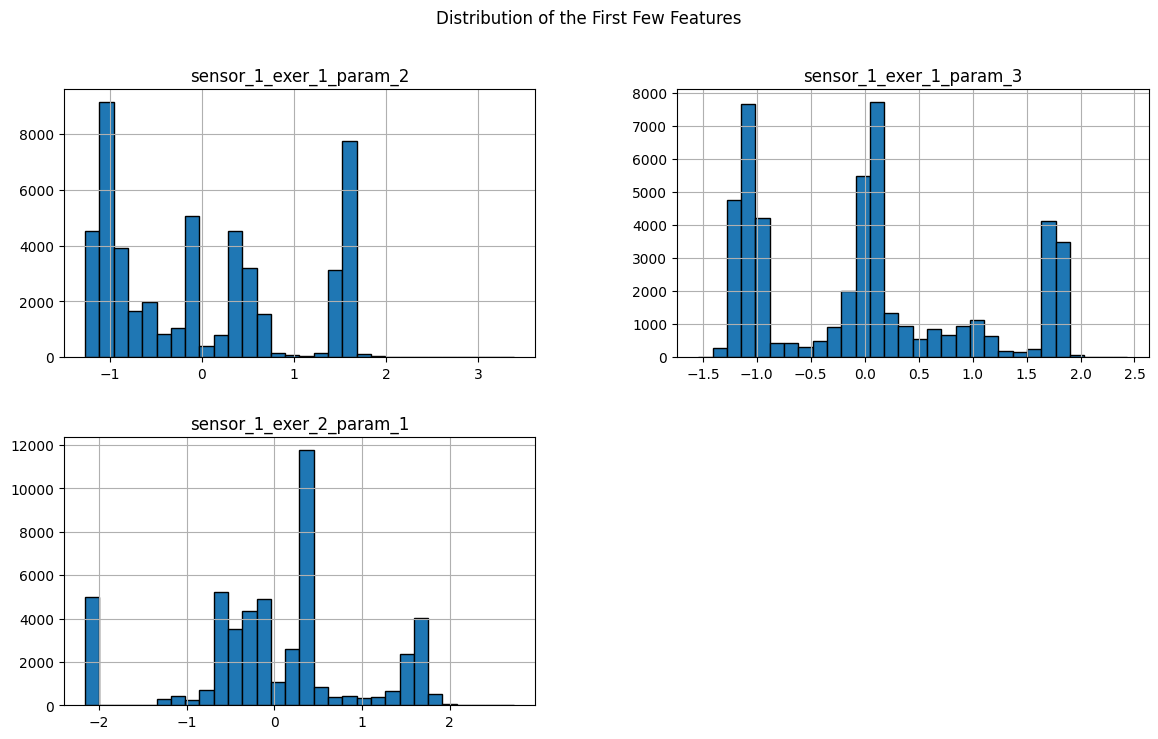

In [ ]:
# Distribution of the first few features
plt.figure(figsize=(6,4))
df_combined[numerical_cols[:10]].hist(bins=30, edgecolor='black', figsize=(14, 8))
plt.suptitle('Distribution of the First Few Features')
plt.show()

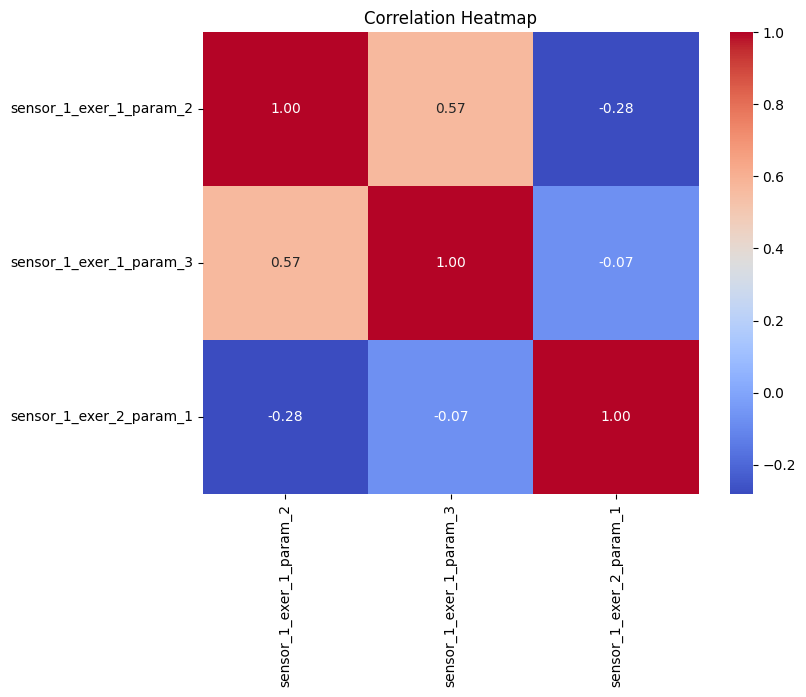

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_combined[numerical_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Data Preprocessing**
* Using Random Forest Classifier

In [ ]:
# Create synthetic target variable using KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df_combined['target'] = kmeans.fit_predict(df_combined[numerical_cols])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Prepare the data for classification
X = df_combined.drop('target', axis=1)
y = df_combined['target']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluate the Random Forest Classifier
print("Random Forest Classifier")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4804
           1       1.00      1.00      1.00      5211

    accuracy                           1.00     10015
   macro avg       1.00      1.00      1.00     10015
weighted avg       1.00      1.00      1.00     10015

Accuracy: 1.00


In [ ]:
# Visualize feature importances
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


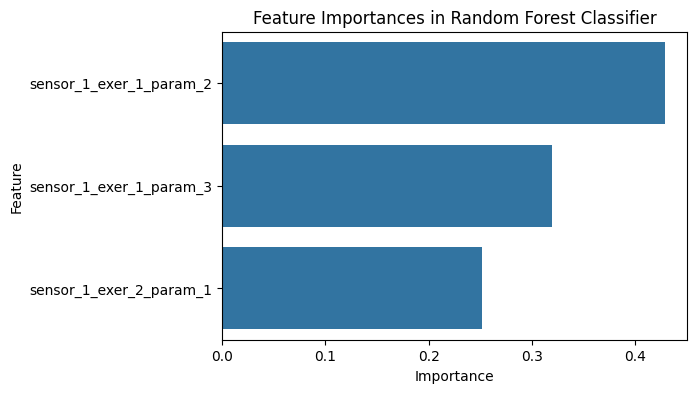

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances in Random Forest Classifier')
plt.show()

**SUMMARY**
* The dataset contains sensor measurements from different exercises, structured to represent multiple sensors and parameters. Through extensive preprocessing, including handling missing values, scaling, and addressing skewness, the data was prepared for machine learning tasks. The Random Forest classifier was then applied to demonstrate the process of training and evaluating a model on this dataset.